In [1]:
# importing the packages
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# readding the data into a data frame
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [6]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [7]:
# correcting data type
df['FullDate'] = pd.to_datetime(df['FullDate'])  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [80]:
df.head(30)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


In [10]:
df_resamp = df.resample('D', on= 'FullDate').sum()

In [11]:
df_resamp.reset_index(inplace= True)

In [12]:
df_resamp.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
# Question 11

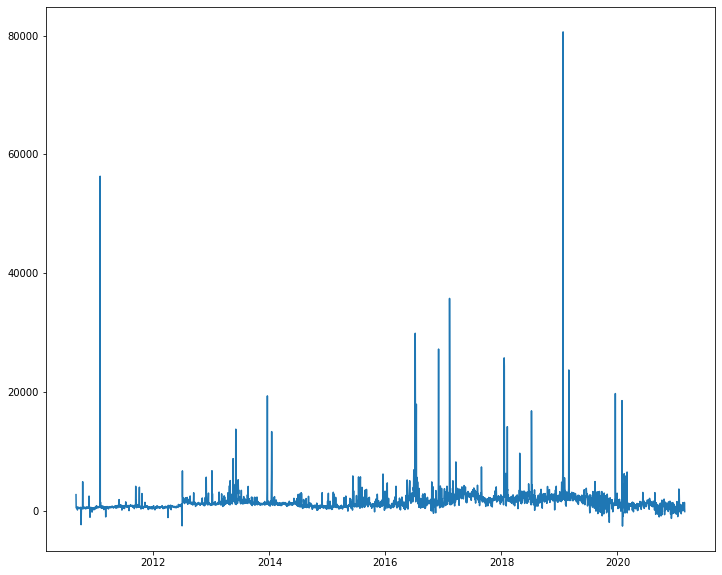

In [13]:
plt.figure(figsize= (12,10))
plt.plot(df_resamp.FullDate, df_resamp.ElecPrice)

In [14]:
# SysLoad and GasPrice 
from statsmodels.tsa.stattools import adfuller
adfuller(df_resamp.SysLoad)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '10%': -2.567174716967499,
  '5%': -2.8623002987378547},
 79103.01504886392)

In [ ]:
# Question 12

In [15]:
round(adfuller(df_resamp.SysLoad)[1], 6)

0.004254

In [17]:
round(adfuller(df_resamp.GasPrice)[1], 6)

0.045027

In [ ]:
# Question 13

In [16]:
adfuller(df_resamp.GasPrice)

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '10%': -2.5671743978048323,
  '5%': -2.8622996992165364},
 32857.5394299048)

In [18]:
adfuller(df_resamp.ElecPrice)

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '10%': -2.5671736550459663,
  '5%': -2.8622983040036005},
 69130.36360776308)

In [20]:
# renaming ‘SysLoad’,’Tmax’,’GasPrice’ to add1, add2, add3
df_resamp.rename(columns = {'SysLoad': 'add1', 'Tmax':'add2', 'GasPrice':'add3'}, inplace= True)

In [21]:
df_resamp.tail()

,FullDate,add2,add1,add3,ElecPrice
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980
3833,2021-02-28,583.2,6675.05485,131.6352,-98.985


In [22]:
def rencolnames(df):
  df.columns = ['ds', 'y']
  return df

In [63]:
len(df)

92016

In [23]:
train_set_all = df_resamp.iloc[:2757, :]
test_set_all = df_resamp.iloc[2757:len(df), :]

In [24]:
train_set = train_set_all.iloc[:, [0,4]]
test_set = test_set_all.iloc[:, [0,4]]

In [25]:
train_set_all.shape

(2757, 5)

In [26]:
test_set_all.shape

(1077, 5)

In [27]:
train_set = rencolnames(train_set)

In [28]:
train_set.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [29]:
train_set.shape

(2757, 2)

In [30]:
test_set= rencolnames(test_set)

In [31]:
test_set.shape

(1077, 2)

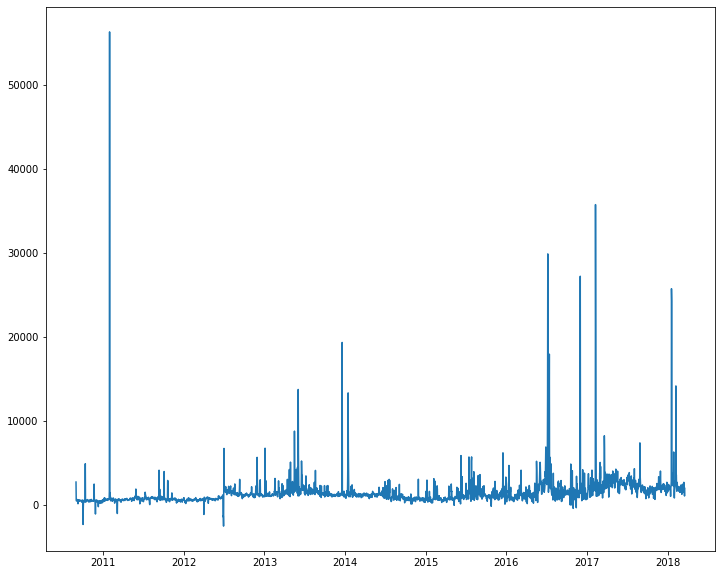

In [32]:
# visualizing The Data
plt.figure(figsize= (12,10))
plt.plot(train_set.ds, train_set.y)

In [33]:
# Creating the model
prophet_model = Prophet()

In [34]:
prophet_model.fit(train_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
preds_on_test = prophet_model.predict(test_set)

In [39]:
test_set.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [40]:
preds_yh= preds_on_test[['ds', 'yhat']]

## Question 15

In [41]:
def mape(tr, pred):
  diff= 0

  for a,b in zip(tr,pred):
    diff += (abs(a-b)/abs(a))*100

  return diff/len(tr)




In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [44]:
mape(test_set.y, preds_yh.yhat)

549.4751413716544

## Question 15

In [45]:
np.sqrt(mean_squared_error(test_set.y, preds_yh.yhat))

3218.15577651241

## Question 16

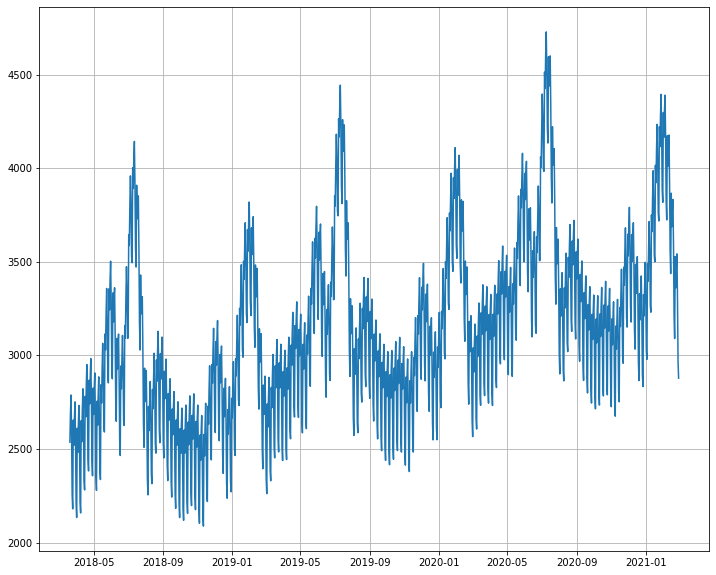

In [46]:
plt.figure(figsize= (12,10))
plt.plot(preds_yh.ds, preds_yh.yhat)
plt.grid()

In [47]:
train_set.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [48]:
df_resamp.head()

,FullDate,add2,add1,add3,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [49]:
test_set_all[test_set_all.FullDate == '2018-03-21']['add1'].values[0]

4658.05865

In [50]:
train_set_all.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
test_set_all.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
train_set_all

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [53]:
multi_prohet = Prophet()
multi_prohet.add_regressor('add1')
multi_prohet.add_regressor('add2')
multi_prohet.add_regressor('add3')

In [54]:
multi_prohet.fit(train_set_all)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
pred2 = multi_prohet.predict(test_set_all)

## Question 17

In [81]:
round(mape(test_set_all.y, pred2.yhat),2)

233.74

## Question 18

In [82]:
round(np.sqrt(mean_squared_error(test_set_all.y, pred2.yhat)),2)

2709.65

## Question 19

In [77]:
pred2[pred2.yhat == pred2.yhat.max()]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
443,2019-06-06,2175.437742,3846.197329,8316.439142,1989.452418,2369.092876,239.204547,239.204547,239.204547,0.248036,...,145.822951,145.822951,145.822951,130.022921,130.022921,130.022921,0.0,0.0,0.0,6120.21951


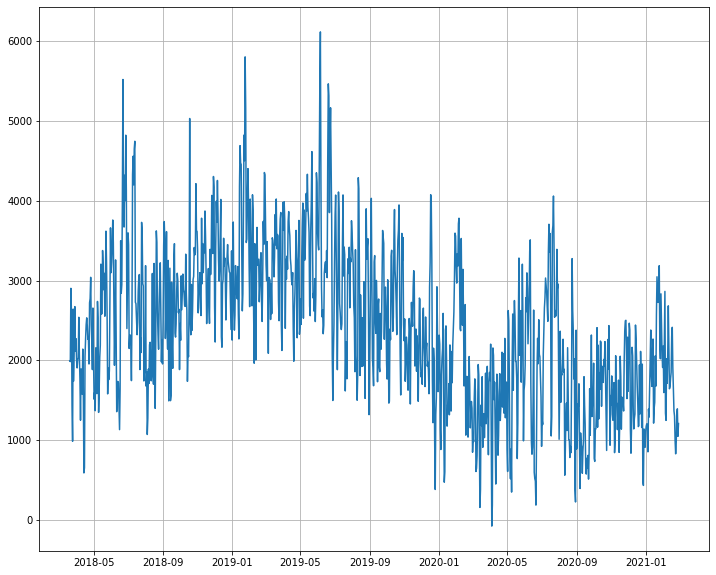

In [59]:
plt.figure(figsize= (12,10))
plt.plot(pred2.ds, pred2.yhat)
plt.grid()